In [1]:
using JLD2
using FileIO
using PyPlot
using Statistics
using StatsBase 
using Distributions
using LinearAlgebra
using HDF5
using IntervalSets
using Random, ArraysOfArrays
using ValueShapes
using Measurements
using BAT
using ForwardDiff
using BenchmarkTools

In [2]:
include("../utill.jl")

plot_projections (generic function with 1 method)

In [8]:
function cov_matr(smpl_tmp)
    smp_fl, w = flatview(unshaped.(smpl_tmp.v)), smpl_tmp.weight
    smp_fl = smp_fl ./ std(smp_fl, FrequencyWeights(w), 2)
    smp_fl = smp_fl .- mean(smp_fl, FrequencyWeights(w), dims=2)
    cov_m = cov(smp_fl, FrequencyWeights(w), 2)
    return cov_m
end

function hist_1d(samples, dim_1, nbins)
    smpl_tmp, smpl_w = flatview(unshaped.(samples.v)), samples.weight
    hist_v = fit(Histogram, smpl_tmp[dim_1,:], FrequencyWeights(round.(Int64, smpl_w)), nbins)
    hist_v = normalize(hist_v, mode=:pdf)
    return hist_v
end

hist_1d (generic function with 1 method)

In [4]:
@load "../../data/sampling_results/Benchmark-5/alignment/mcmc-summary-data.jld" summary_data

1-element Array{Symbol,1}:
 :summary_data

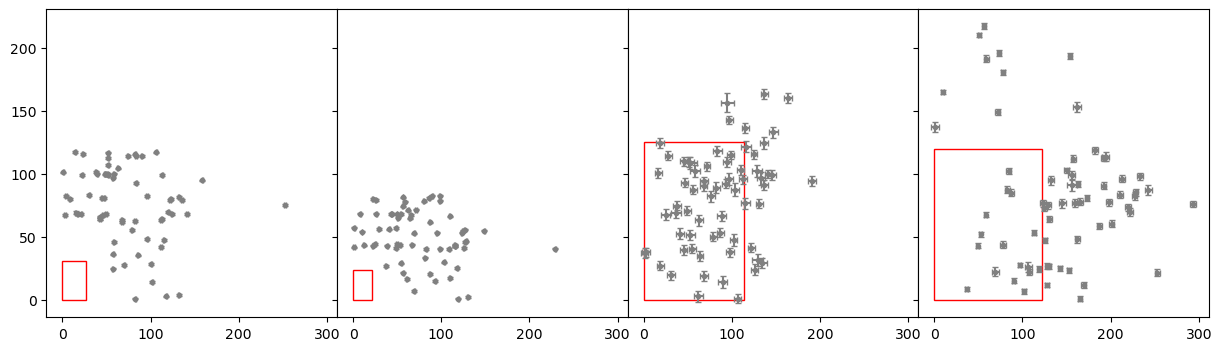

PyObject <matplotlib.patches.Rectangle object at 0x7f8695806760>

In [5]:
fig, ax = plt.subplots(1,4, figsize=(15,4), sharex=true, sharey=true)

fig.subplots_adjust(hspace=0.0, wspace=0.0)

x_tmp = [i[1] for i in summary_data.μx_align]
y_tmp = [i[1] for i in summary_data.μy_align]
x_std = [i[1] for i in summary_data.σx_align]
y_std = [i[1] for i in summary_data.σy_align]
ax[1].errorbar(x_tmp, y_tmp, xerr = x_std, yerr=y_std, capsize=2,  fmt = ".", color="gray")

x_tmp = [i[2] for i in summary_data.μx_align]
y_tmp = [i[2] for i in summary_data.μy_align]
x_std = [i[2] for i in summary_data.σx_align]
y_std = [i[2] for i in summary_data.σy_align]
ax[2].errorbar(x_tmp, y_tmp, xerr = x_std, yerr=y_std, capsize=2,  fmt = ".", color="gray")

x_tmp = [i[3] for i in summary_data.μx_align]
y_tmp = [i[3] for i in summary_data.μy_align]
x_std = [i[3] for i in summary_data.σx_align]
y_std = [i[3] for i in summary_data.σy_align]
ax[3].errorbar(x_tmp, y_tmp, xerr = x_std, yerr=y_std, capsize=2,  fmt = ".", color="gray")

x_tmp = [i[4] for i in summary_data.μx_align]
y_tmp = [i[4] for i in summary_data.μy_align]
x_std = [i[4] for i in summary_data.σx_align]
y_std = [i[4] for i in summary_data.σy_align]
ax[4].errorbar(x_tmp, y_tmp, xerr = x_std, yerr=y_std, capsize=2,  fmt = ".", color="gray")

rect = matplotlib.patches.Rectangle([0,0,], 27.1,30.5,linewidth=1,edgecolor="r",facecolor="none")
ax[1].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  21.6, 23.4,linewidth=1,edgecolor="r",facecolor="none")
ax[2].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  114.0, 125.0,linewidth=1,edgecolor="r",facecolor="none")
ax[3].add_patch(rect)

rect = matplotlib.patches.Rectangle([0,0,],  121.8, 120.0,linewidth=1,edgecolor="r",facecolor="none")
ax[4].add_patch(rect)


# Batch 1: 

In [17]:
# Batch 1: 

n_events = 16
n_cameras = 4

prior_ang = NamedTupleDist(
    θ = [10^-15 .. 10^-4 for i in 1:n_events],
    α = [0 .. 2*pi  for i in 1:n_events],
    x_alignm = [-300 .. 300 for i in 1:3],
    y_alignm = [-300 .. 300 for i in 1:3],
    σ = [0 .. 0.8],
);

smpl_1 = bat_read("../../data/sampling_results/Benchmark-5/alignment/samples-batch-1.hdf5")
smpl_1 = varshape(prior_ang).(smpl_1)
ind_1 = 1:16;

charge_1 = [9.017000198364258, 9.514900207519531, 8.502799987792969, 9.030599594116211, 9.336899757385254, 7.766900062561035, 9.496800422668457, 8.863100051879883, 9.418399810791016, 8.154500007629395, 9.160099983215332, 8.99940013885498, 9.308199882507324, 10.11870002746582, 9.459699630737305, 8.551199913024902];
ind_1 = [316, 325, 326, 327, 328, 452, 329, 330, 466, 331, 484, 332, 333, 334, 317, 335];

In [18]:
nbins = range(0, stop=2*pi, length=250)
hist_array = [hist_1d(smpl_1, i, nbins) for i in n_events+1:2*n_events];

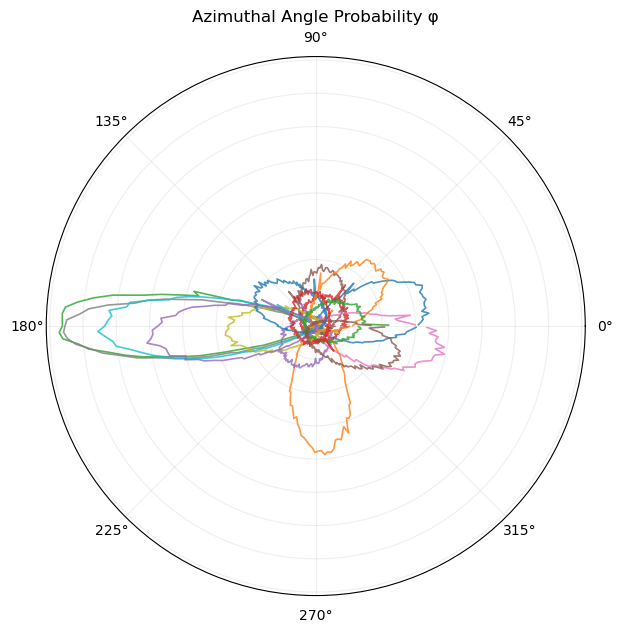

PyObject Text(0.5, 1.05, 'Azimuthal Angle Probability φ')

In [19]:
fig = figure(figsize=(7,7))

ax = PyPlot.axes(polar="true") # Create a polar axis

for i in eachindex(hist_array)[end:-1:1]
    ax.plot(midpoints(hist_array[i].edges[1]), 
        hist_array[i].weights, 
        lw=1.2,  "o-", 
#         color= plt.cm.hot_r(az_angles[i]), 
        alpha=0.8, 
        marker="None") 
end

# cb = ax.scatter(az_angles, az_angles, lw=0.0,  s=0.0, c=legend_tmp, cmap="hot_r")
# ax_ins_3 = fig.add_axes([0.5,0.15,0.02,0.2])
# fig.colorbar(cb, spacing="proportional", label="Log. Polar Angle", cax=ax_ins_3)

#color=plt.cm.Spectral(i/length(hist_array))
ax.grid(alpha=0.2)
# ax.set_ylabel("")
ax.set_yticklabels([])
# ax.set_ylim(0, 6.5)
ax.set_title("Azimuthal Angle Probability φ")